In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [2]:
data = pd.read_csv('D:\Downloads\Onelogica\META.csv')
data = data[['Date', 'Close']]  # Assuming 'Date' and 'Close' columns are present
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

In [3]:
# Extract the closing prices
closing_prices = data['Close']

In [4]:
closing_prices = data['Close'].values.reshape(-1, 1)

In [6]:
sequence_length = 30  

In [7]:
def create_sequences(data, sequence_length):
    sequences = []
    targets = []
    for i in range(len(data) - sequence_length):
        sequences.append(data[i:i+sequence_length])
        targets.append(data[i+sequence_length])
    return np.array(sequences), np.array(targets)

In [8]:
sequences, targets = create_sequences(data_scaled, sequence_length)


In [9]:
# Split the data into training and testing sets
split_percentage = 0.8
split_index = int(split_percentage * len(sequences))

X_train, y_train = sequences[:split_index], targets[:split_index]
X_test, y_test = sequences[split_index:], targets[split_index:]

In [10]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [12]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
31/31 [==============================] - 4s 25ms/step - loss: 0.0881
Epoch 2/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0046
Epoch 3/100
31/31 [==============================] - 1s 32ms/step - loss: 0.0023
Epoch 4/100
31/31 [==============================] - 1s 31ms/step - loss: 0.0021
Epoch 5/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0021
Epoch 6/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0018
Epoch 7/100
31/31 [==============================] - 1s 18ms/step - loss: 0.0017
Epoch 8/100
31/31 [==============================] - 1s 23ms/step - loss: 0.0015
Epoch 9/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0015
Epoch 10/100
31/31 [==============================] - 1s 19ms/step - loss: 0.0014
Epoch 11/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0013
Epoch 12/100
31/31 [==============================] - 1s 27ms/step - loss: 0.0013
Epoch 13/100
31/31 [=====

In [13]:
# Evaluate the model
loss = model.evaluate(X_test, y_test)
print(f'Model Loss: {loss}')


8/8 [==============================] - 1s 9ms/step - loss: 4.5090e-04
Model Loss: 0.0004509007267188281


In [14]:
# Make predictions
predictions = model.predict(X_test)

8/8 [==============================] - 0s 7ms/step


In [15]:
# Inverse transform the predictions and actual values to the original scale
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test)

In [16]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have the true values (y_test) and predictions (predicted_prices)
# Make sure both arrays have the same length

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test_actual, predictions)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print('Mean Squared Error (MSE):', mse)
print('Root Mean Squared Error (RMSE):', rmse)


Mean Squared Error (MSE): 38.780758616898325
Root Mean Squared Error (RMSE): 6.227419900480321


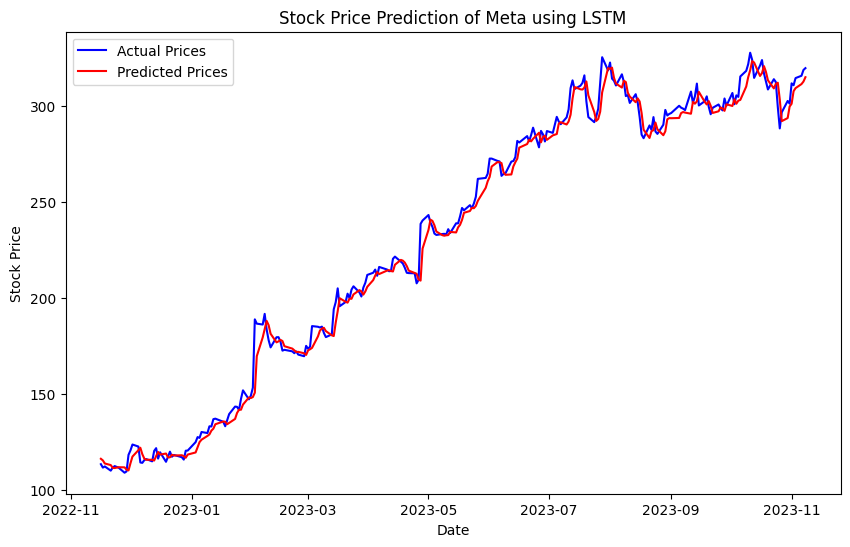

In [17]:
# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(data.index[-len(y_test_actual):], y_test_actual, label='Actual Prices', color='blue')
plt.plot(data.index[-len(predictions):], predictions, label='Predicted Prices', color='red')
plt.title('Stock Price Prediction of Meta using LSTM')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [18]:
# Take the last `sequence_length` days from the original data
last_sequence = closing_prices[-sequence_length:]

# Normalize the data
last_sequence_scaled = scaler.transform(last_sequence)

# Reshape the data for LSTM input
last_sequence_scaled = np.reshape(last_sequence_scaled, (1, sequence_length, 1))

# Make the prediction
predicted_scaled = model.predict(last_sequence_scaled)

# Inverse transform the predicted value to get the actual stock price
predicted_price = scaler.inverse_transform(predicted_scaled)

print("Predicted Stock Price for Tomorrow:", predicted_price[0, 0])

1/1 [==============================] - 0s 41ms/step
Predicted Stock Price for Tomorrow: 316.55368


c:\Users\kumar\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
